# IAGOS Ozone Data Analysis - ENVRI-ID Token Introspection Demo

This notebook demonstrates **ENVRI-ID token introspection by the AERIS SSO system** through downloading IAGOS atmospheric data and visualizing ozone timeseries.

## Token Introspection Process

1. **ENVRI-ID Authentication**: OAuth2 device flow obtains ENVRI-ID token
2. **AERIS API Request**: Token is sent to AERIS-protected IAGOS API
3. **Token Introspection**: AERIS SSO validates the ENVRI-ID token
4. **Access Control**: Data access granted/denied based on token validity
5. **Data Analysis**: Successful authentication allows NetCDF data download and analysis

## 1. Import required libraries

In [2]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import xarray as xr

# Add the src directory to Python path for development
# Compatible with both Jupyter and script execution
try:
    # For Jupyter notebooks
    notebook_dir = os.getcwd()
    src_path = os.path.join(notebook_dir, '..', 'src')
except:
    # Fallback for scripts
    src_path = os.path.join(os.path.dirname(__file__), '..', 'src')

sys.path.insert(0, os.path.abspath(src_path))

# Import our custom module
from iagos_envri.iagos_introspection import downloadOneFlight

## 2. Download IAGOS data using OAuth2 - Token Introspection Demo

This section demonstrates **ENVRI-ID token introspection by AERIS SSO**:

1. **OAuth2 Device Flow**: Initiates ENVRI-ID authentication
2. **Token Acquisition**: Obtains valid ENVRI-ID access token  
3. **API Request**: Sends authenticated request to AERIS-protected IAGOS API
4. **Token Introspection**: AERIS SSO validates the ENVRI-ID token in real-time
5. **Access Grant**: Successful introspection allows data download

You'll need to authenticate via browser - this demonstrates the complete ENVRI-ID token lifecycle and validation by AERIS SSO.

In [3]:
# Define flight ID and output directory
flight_id = "2023050203041714"
output_dir = "/tmp"

print(f"=== ENVRI-ID Token Introspection Demo ===")
print(f"Downloading flight {flight_id} using OAuth2 authentication...")
print("This demonstrates AERIS SSO performing ENVRI-ID token introspection")
print("Please follow the authentication instructions that will appear.")
print()

# Download using OAuth2 - demonstrates token introspection by AERIS SSO
try:
    # The downloadOneFlight function will:
    # 1. Obtain ENVRI-ID token via OAuth2
    # 2. Send authenticated request to AERIS-protected API
    # 3. AERIS SSO will introspect the token to validate access
    # 4. Grant or deny access based on token validity
    downloadOneFlight(flight_id, output_dir, use_oauth=True)
    print(f"✓ Token introspection successful - Download completed!")
    print("AERIS SSO successfully validated the ENVRI-ID token")
except Exception as e:
    print(f"✗ Token introspection failed: {e}")
    print("AERIS SSO rejected or could not validate the ENVRI-ID token")

=== ENVRI-ID Token Introspection Demo ===
This demonstrates AERIS SSO performing ENVRI-ID token introspection
Please follow the authentication instructions that will appear.

Initiating OAuth2 device flow...

Please open this URL in your browser:
https://login.staging.envri.eu/device?user_code=IRAP-LSIG

Waiting for authentication... (expires in 1800 seconds)
⏳ Still waiting for authorization...
✓ Authentication successful!
File downloaded : /tmp/2023050203041714.nc
✓ Token introspection successful - Download completed!
AERIS SSO successfully validated the ENVRI-ID token


## 3. Load and explore the NetCDF file - Result of Successful Token Introspection

The following analysis is only possible because AERIS SSO successfully validated our ENVRI-ID token through introspection, granting access to the protected IAGOS data.

In [4]:
# Load the NetCDF file
file_path = f"{output_dir}/{flight_id}.nc"

if os.path.exists(file_path):
    print(f"Loading file: {file_path}")
    ds = xr.open_dataset(file_path)
    print(f"File loaded successfully!")
    print(f"\nDataset dimensions: {dict(ds.dims)}")
    print(f"\nAvailable variables:")
    for var in ds.data_vars:
        print(f"  - {var}: {ds[var].attrs.get('long_name', 'No description')}")
else:
    print(f"File not found: {file_path}")
    print("Please run the download cell above first.")

Loading file: /tmp/2023050203041714.nc
File loaded successfully!

Dataset dimensions: {'UTC_time': 2726}

Available variables:
  - baro_alt_AC_validity_flag: Barometric altitude validity
  - radio_alt_AC: Radio altitude
  - radio_alt_AC_validity_flag: Radio altitude validity
  - gps_alt_AC: GPS altitude
  - gps_alt_AC_validity_flag: GPS altitude validity
  - air_press_AC: Air pressure
  - air_press_AC_validity_flag: Air pressure validity
  - air_speed_AC: Aircraft air speed
  - air_speed_AC_validity_flag: Aircraft air speed validity
  - ground_speed_AC: Aircraft ground speed
  - ground_speed_AC_validity_flag: Aircraft ground speed validity
  - air_temp_AC: Air temperature
  - air_temp_AC_validity_flag: Air temperature validity
  - air_stag_temp_AC: Stagnation air temperature
  - air_stag_temp_AC_validity_flag: Stagnation air temperature validity
  - wind_dir_AC: Wind direction
  - wind_dir_AC_validity_flag: Wind direction validity
  - wind_speed_AC: Wind speed
  - wind_speed_AC_validit

/tmp/ipykernel_169481/2003335552.py:8: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print(f"\nDataset dimensions: {dict(ds.dims)}")


## 4. Extract ozone data

In [5]:
# Look for ozone variables (common names: O3, ozone, O3_vmr)
ozone_vars = [var for var in ds.data_vars if 'o3' in var.lower() or 'ozone' in var.lower()]

if ozone_vars:
    print(f"Found ozone variables: {ozone_vars}")
    ozone_var = ozone_vars[0]  # Use the first ozone variable found
    print(f"Using variable: {ozone_var}")
    
    # Extract ozone data and time
    ozone_data = ds[ozone_var]
    time_data = ds['UTC_time'] if 'UTC_time' in ds else ds.coords['time']
    
    print(f"\nOzone variable info:")
    print(f"  Long name: {ozone_data.attrs.get('long_name', 'N/A')}")
    print(f"  Units: {ozone_data.attrs.get('units', 'N/A')}")
    print(f"  Shape: {ozone_data.shape}")
    print(f"  Valid data points: {np.sum(~np.isnan(ozone_data))}")
    
else:
    print("No ozone variables found. Available variables:")
    for var in ds.data_vars:
        print(f"  - {var}")
    # Let's try to find any concentration or mixing ratio variables
    possible_vars = [var for var in ds.data_vars if any(term in var.lower() for term in ['vmr', 'conc', 'mixing', 'ppb', 'ppm'])]
    if possible_vars:
        print(f"\nPossible atmospheric concentration variables: {possible_vars}")
        ozone_var = possible_vars[0]
        ozone_data = ds[ozone_var]
        time_data = ds['UTC_time'] if 'UTC_time' in ds else ds.coords['time']
    else:
        ozone_var = None

Found ozone variables: ['O3_P1', 'O3_P1_error', 'O3_P1_validity_flag', 'O3_P1_process_flag']
Using variable: O3_P1

Ozone variable info:
  Long name: Ozone mixing ratio
  Units: ppb
  Shape: (2726,)
  Valid data points: <xarray.DataArray 'O3_P1' ()> Size: 8B
array(2687)


## 5. Create ozone timeseries visualization

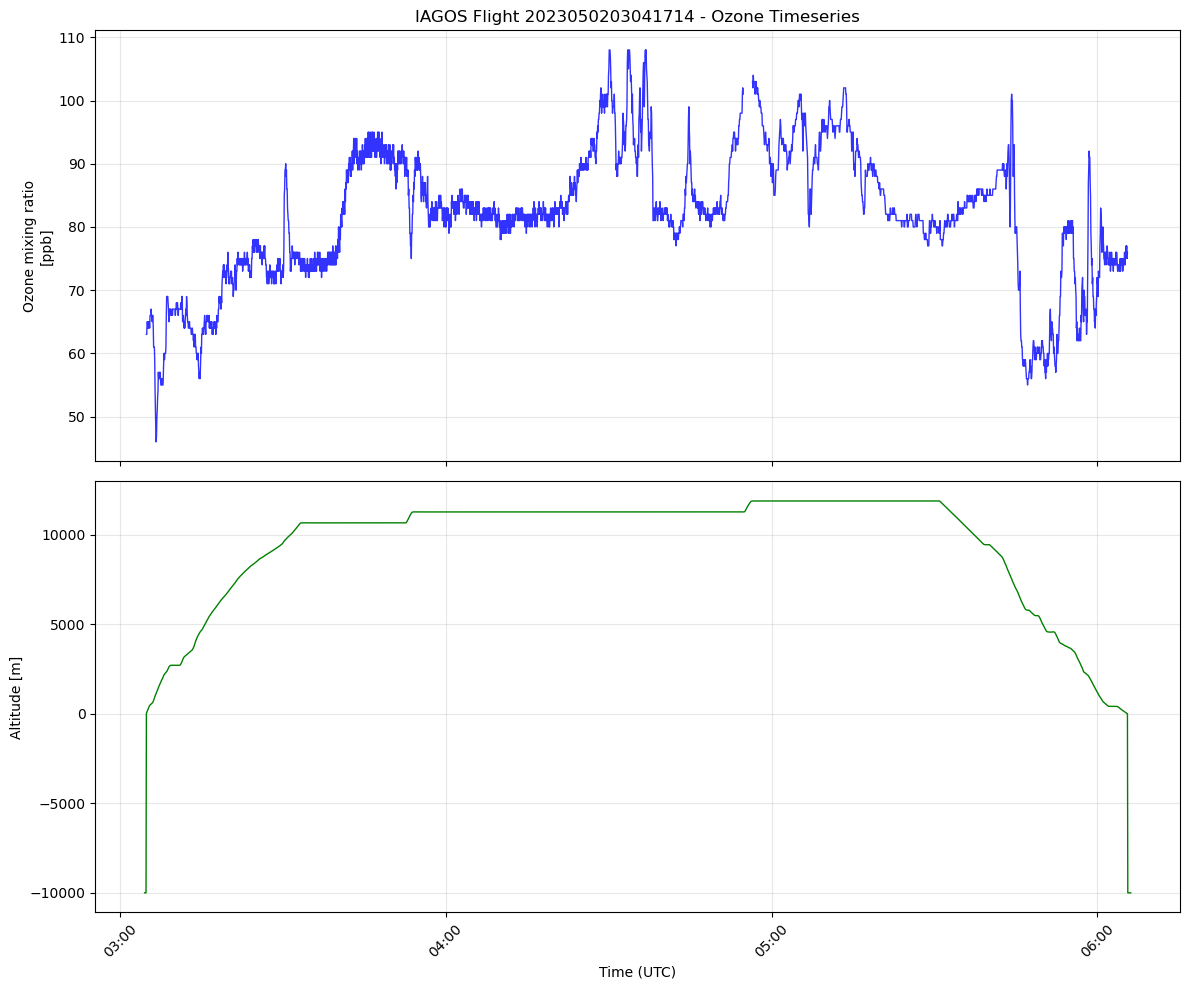

TypeError: DataArray.dropna() missing 1 required positional argument: 'dim'

In [6]:
if ozone_var:
    # Create the plot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
    
    # Convert time to datetime if needed
    if hasattr(time_data, 'values'):
        time_values = pd.to_datetime(time_data.values)
    else:
        time_values = time_data
    
    # Plot 1: Ozone timeseries
    ax1.plot(time_values, ozone_data, 'b-', linewidth=1, alpha=0.8)
    ax1.set_ylabel(f'{ozone_data.attrs.get("long_name", ozone_var)}\n[{ozone_data.attrs.get("units", "units")}]')
    ax1.set_title(f'IAGOS Flight {flight_id} - Ozone Timeseries')
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Altitude profile if available
    if 'baro_alt_AC' in ds or 'altitude' in ds or 'alt' in ds:
        alt_var = 'baro_alt_AC' if 'baro_alt_AC' in ds else ('altitude' if 'altitude' in ds else 'alt')
        altitude_data = ds[alt_var]
        
        ax2.plot(time_values, altitude_data, 'g-', linewidth=1)
        ax2.set_ylabel(f'Altitude [{altitude_data.attrs.get("units", "m")}]')
        ax2.set_xlabel('Time (UTC)')
        ax2.grid(True, alpha=0.3)
    else:
        # If no altitude, show ozone statistics
        ozone_clean = ozone_data.dropna()
        ax2.hist(ozone_clean, bins=50, alpha=0.7, color='orange', edgecolor='black')
        ax2.set_ylabel('Frequency')
        ax2.set_xlabel(f'{ozone_data.attrs.get("long_name", ozone_var)} [{ozone_data.attrs.get("units", "units")}]')
        ax2.set_title('Ozone Distribution')
        ax2.grid(True, alpha=0.3)
    
    # Format time axis
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax2.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    ozone_clean = ozone_data.dropna()
    print(f"\nOzone Summary Statistics:")
    print(f"  Mean: {np.mean(ozone_clean):.2f} {ozone_data.attrs.get('units', 'units')}")
    print(f"  Median: {np.median(ozone_clean):.2f} {ozone_data.attrs.get('units', 'units')}")
    print(f"  Min: {np.min(ozone_clean):.2f} {ozone_data.attrs.get('units', 'units')}")
    print(f"  Max: {np.max(ozone_clean):.2f} {ozone_data.attrs.get('units', 'units')}")
    print(f"  Std: {np.std(ozone_clean):.2f} {ozone_data.attrs.get('units', 'units')}")

else:
    print("Cannot create visualization - no suitable ozone variable found.")

## 6. Additional analysis (optional)

In [7]:
# Show dataset structure for further exploration
if 'ds' in locals():
    print("Complete dataset information:")
    print(ds.info())
    
    print("\nDataset coordinates:")
    for coord in ds.coords:
        print(f"  {coord}: {ds.coords[coord].attrs.get('long_name', 'No description')}")

Complete dataset information:
xarray.Dataset {
dimensions:
	UTC_time = 2726 ;

variables:
	datetime64[ns] UTC_time(UTC_time) ;
		UTC_time:standard_name = time ;
		UTC_time:long_name = UTC time ;
		UTC_time:coverage_content_type = coordinate ;
		UTC_time:source = Aircraft ;
		UTC_time:axis = T ;
		UTC_time:availability = 1.0 ;
	float64 lon(UTC_time) ;
		lon:standard_name = longitude ;
		lon:long_name = Longitude ;
		lon:comment = Measured by aircraft ;
		lon:units = degree_east ;
		lon:axis = Y ;
		lon:coverage_content_type = coordinate ;
		lon:source = Aircraft ;
		lon:availability = 1.0 ;
	float64 lat(UTC_time) ;
		lat:standard_name = latitude ;
		lat:long_name = Latitude ;
		lat:comment = Measured by aircraft ;
		lat:units = degree_north ;
		lat:axis = X ;
		lat:coverage_content_type = coordinate ;
		lat:source = Aircraft ;
		lat:availability = 1.0 ;
	float64 baro_alt_AC(UTC_time) ;
		baro_alt_AC:standard_name = barometric_altitude ;
		baro_alt_AC:long_name = Barometric altitude ;
		

## Clean up

In [8]:
# Close the dataset
if 'ds' in locals():
    ds.close()
    print("Dataset closed.")

Dataset closed.
